In [2]:
import pandas as pd
fake_las_kgl = pd.read_csv('fake_data/fake_data_collect_kgl.csv', delimiter=';')
del fake_las_kgl['Unnamed: 0']
fake_las_kgl.head()

,kgl,wc
0,"[0.2271827161, 0.2292189108184549, 0.226675257...",0.22
1,"[0.3963141739, 0.39631417390000007, 0.40498641...",0.39
2,"[0.2935534418, 0.3053143287430829, 0.303001516...",0.38
3,"[0.3775226176, 0.3775226176, 0.354627072799999...",0.31
4,"[0.147988826, 0.17931516317458643, 0.208930206...",0.39


In [36]:
fake_las_kgl.replace(',', ';', regex=True, inplace=True)
fake_las_kgl.to_csv('fake_data/fake_data_collect_kgl_1.csv', index=False, sep = ';')

In [4]:
fake_las_kgl = pd.read_csv('fake_data/fake_data_collect_kgl_1.csv', delimiter=';')
fake_las_kgl = fake_las_kgl.rename(columns={100: "wc"})
fake_las_kgl.head()

,kgl 1,kgl 2,kgl 3,kgl 4,kgl 5,kgl 6,kgl 7,kgl 8,kgl 9,kgl 10,...,kgl 92,kgl 93,kgl 94,kgl 95,kgl 96,kgl 97,kgl 98,kgl 99,kgl 100,wc
0,0.227183,0.229219,0.226675,0.216163,0.123856,0.122162,0.124524,0.121009,0.115269,0.122897,...,0.100685,0.107715,0.117733,0.119287,0.108693,0.114867,0.147499,0.131292,0.114781,0.22
1,0.396314,0.396314,0.404986,0.305105,0.268331,0.292826,0.262488,0.282108,0.299649,0.277263,...,0.134884,0.121387,0.094553,0.120820,0.347750,0.364641,0.353523,0.336004,0.416229,0.39
2,0.293553,0.305314,0.303002,0.308562,0.310217,0.304514,0.310325,0.327548,0.289342,0.289983,...,0.421735,0.435352,0.437670,0.434946,0.434682,0.432638,0.416016,0.415558,0.420287,0.38
3,0.377523,0.377523,0.354627,0.357531,0.360867,0.344058,0.333473,0.340105,0.348635,0.345380,...,0.257030,0.288878,0.292152,0.292536,0.296641,0.307266,0.287952,0.315756,0.313107,0.31
4,0.147989,0.179315,0.208930,0.222672,0.197656,0.182883,0.177504,0.179439,0.207470,0.203137,...,0.224901,0.226155,0.237325,0.161780,0.141492,0.140836,0.125245,0.129295,0.129360,0.39


In [5]:
y_values = fake_las_kgl['wc']
y_values.shape

(5322,)

In [8]:
import numpy as np
# del fake_las_kgl['wc']
x_values = np.array(fake_las_kgl)
print(x_values.shape)

(5322, 100)


In [9]:
from sklearn.model_selection import train_test_split, StratifiedKFold
x_train, x_hold, y_train, y_hold = train_test_split(x_values, y_values, test_size=0.3, random_state=17)

In [10]:
print(min(y_values))
print(max(y_values))
print(max(y_values) - min(y_values))

0.13
0.62
0.49


In [70]:
del model

In [11]:
from keras.datasets import boston_housing
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Устанавливаем seed для повторяемости результатов
np.random.seed(42)
# Создаем последовательную модель
model = Sequential()

model.add(Dense(250, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dense(200, activation='relu', input_shape=(250,)))
model.add(Dense(100, activation='relu', input_shape=(200,)))
model.add(Dropout(0.2))
model.add(Dense(100, activation='relu', input_shape=(100,)))
model.add(Dense(49, activation='relu', input_shape=(100,)))
model.add(Dense(1))

# Компилируем модель
model.compile(loss="mse", optimizer="adam", metrics=['mae'])

print(model.summary())

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 250)               25250     
_________________________________________________________________
dense_2 (Dense)              (None, 200)               50200     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               20100     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_5 (Dense)              (None, 49)                4949      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 50        
Total para

In [12]:
# Обучаем сеть
model.fit(x_train, y_train, batch_size=5, nb_epoch=50, verbose=1)

C:\Users\M1\Anaconda3\lib\site-packages\keras\models.py:874: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/50
3725/3725 [==============================] - 2s 575us/step - loss: 0.0060 - mean_absolute_error: 0.0591
Epoch 2/50
3725/3725 [==============================] - 2s 502us/step - loss: 0.0044 - mean_absolute_error: 0.0514
Epoch 3/50
3725/3725 [==============================] - 2s 505us/step - loss: 0.0041 - mean_absolute_error: 0.0491
Epoch 4/50
3725/3725 [==============================] - 2s 541us/step - loss: 0.0036 - mean_absolute_error: 0.0459
Epoch 5/50
3725/3725 [==============================] - 2s 480us/step - loss: 0.0035 - mean_absolute_error: 0.0448
Epoch 6/50
3725/3725 [==============================] - 2s 507us/step - loss: 0.0033 - mean_absolute_error: 0.0434
Epoch 7/50
3725/3725 [==============================] - 2s 456us/step - loss: 0.0031 - mean_absolute_error: 0.0415
Epoch 8/50
3725/3725 [==============================] - 2s 427us/step - loss: 0.0028 - mean_absolute_error: 0.0393
Epoch 9/50
3725/3725 [==============================] - 2s 416us/step - loss: 0.

In [13]:
import numpy as np
import pandas as pd
real_las_aps_wc_real = pd.read_csv('fake_data/_kgl_real_wc.csv', delimiter=';')
real_las_aps_wc_real.head()

real_las_aps_wc_calc = pd.read_csv('fake_data/_kgl_calc_wc.csv', delimiter=';')
real_las_aps_wc_calc.head()

y_real_wc = real_las_aps_wc_real['wc']
y_real_wc = np.array(y_real_wc)
print(y_real_wc.shape)
del real_las_aps_wc_real['wc']
x_real_wc = np.array(real_las_aps_wc_real)
print(x_real_wc.shape)

y_real_wc_calc = real_las_aps_wc_calc['wc']
y_real_wc_calc = np.array(y_real_wc_calc)
print(y_real_wc_calc.shape)
del real_las_aps_wc_calc['wc']
x_real_wc_calc = np.array(real_las_aps_wc_calc)
print(x_real_wc_calc.shape)

(160,)
(160, 100)
(160,)
(160, 100)


In [14]:
print(min(y_real_wc))
print(max(y_real_wc))

print(min(y_real_wc_calc))
print(max(y_real_wc_calc))

0.01
0.84
0.129652
0.622246


In [15]:
y_predict = model.predict(x_hold)
y_real_wc_calc_predict = model.predict(x_real_wc_calc)
y_real_wc_predict = model.predict(x_real_wc)

In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score

def data_analize_func(predict_for_analize, file_name = ''):
    # подготовка данных
    data_for_analize = predict_for_analize.sort_values(by=['y_hold'])
    data_for_analize['x_axis'] = [x for x in range(len(predict_for_analize['y_hold']))]
    data_for_analize.head()
    if file_name != '':
        data_for_analize.to_csv('AllGisParams/' + file_name, index=False, sep = ';')
    
    # построение графиков
    plt.scatter(data_for_analize['x_axis'], data_for_analize['y_predict'], color = 'blue')
    plt.scatter(data_for_analize['x_axis'], data_for_analize['y_hold'], color = 'red')
    plt.show()
    
    # regression metrics
    print('MSE                      = '+ str(mean_squared_error(data_for_analize['y_hold'], 
                                                                data_for_analize['y_predict'])))
    print('MAE                      = '+ str(mean_absolute_error(data_for_analize['y_hold'], 
                                                                 data_for_analize['y_predict'])))
    print('r2_score                 = '+ str(r2_score(data_for_analize['y_hold'], 
                                                      data_for_analize['y_predict'])) + '    (best_value is 1)')
    print('explained_variance_score = '+ str(explained_variance_score(data_for_analize['y_hold'], 
                                                                      data_for_analize['y_predict'])) + '    (best_value is 1)')

Анализ тестовой вывборки на сгенерированных данных kgl


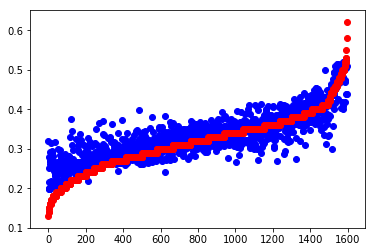

MSE                      = 0.00117566024045
MAE                      = 0.0253081003214
r2_score                 = 0.761064335143    (best_value is 1)
explained_variance_score = 0.804294760228    (best_value is 1)


In [17]:
analize_fake = pd.DataFrame({'y_hold':y_hold, 'y_predict':y_predict[:,0]})

analize_real_wc_calc = pd.DataFrame({'y_hold':y_real_wc_calc, 'y_predict':y_real_wc_calc_predict[:,0]})
analize_real_wc = pd.DataFrame({'y_hold':y_real_wc, 'y_predict':y_real_wc_predict[:,0]})

print('Анализ тестовой вывборки на сгенерированных данных kgl')
data_analize_func(analize_fake)

Анализ реальных kgl с аппроксимированными значениями wc


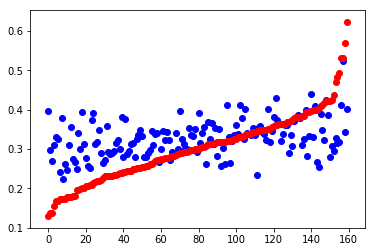

MSE                      = 0.00708945771494
MAE                      = 0.0642622232917
r2_score                 = 0.0522072386539    (best_value is 1)
explained_variance_score = 0.137383869292    (best_value is 1)


In [18]:
print('Анализ реальных kgl с аппроксимированными значениями wc')
data_analize_func(analize_real_wc_calc)

Анализ реальных kgl с реальными значениями wc


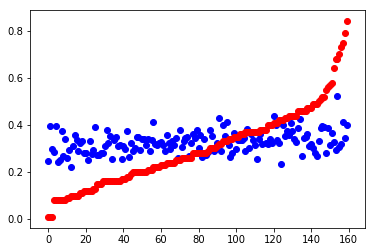

MSE                      = 0.0245347010606
MAE                      = 0.126269787949
r2_score                 = 0.0893912956455    (best_value is 1)
explained_variance_score = 0.117068596914    (best_value is 1)


In [19]:
print('Анализ реальных kgl с реальными значениями wc')
data_analize_func(analize_real_wc)

In [20]:
# Генерируем описание модели в формате json
model_json = model.to_json()
# Записываем модель в файл
json_file = open("fake_data/fake_kgl_model.json", "w")
json_file.write(model_json)
json_file.close()

model.save_weights("fake_data/fake_kgl_model.h5")